## Project 1: Toy stochastic climate models

In [ ]:
#Project 1: Toy stochastic climate models

import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import glob, os
import math
import matplotlib.colors as colors
import pandas as pd
from scipy import stats
from scipy import signal
import scipy as sp
from statsmodels.tsa.seasonal import seasonal_decompose 
import urllib.request # the lib that handles the url access


# i) SSH and SST anomalies 

In [ ]:
#@title
#Open data file from url
data = urllib.request.urlopen('https://webspace.science.uu.nl/~dijks101/MPE-CDT/SSH_SST_Pacific.txt')

#Read data as proposed 
lines = data.readlines()

time    = np.zeros(len(lines) - 3)
ssh     = np.zeros(len(time))
temp    = np.zeros(len(time))

for time_i in range(len(time)):
    #Read in the data
    line = lines[time_i + 3].split()

    #Save the corresponding data in the relevant array
    time[time_i]    = datetime.datetime(int(line[2]), int(line[1]), int(line[0])).toordinal()
    ssh[time_i]     = float(line[3])
    temp[time_i]    = float(line[4])
	

# Code from Calvin's Notebook

In [ ]:
from pylab import *
import numpy
import datetime
import time
import glob, os
import math
import matplotlib.colors as colors
from scipy import stats
import urllib.request # the lib that handles the url access

## Exercise 1

Basic plots of the timeseries


In [ ]:
#@title
#Open data file from url
data = urllib.request.urlopen('https://webspace.science.uu.nl/~dijks101/MPE-CDT/SSH_SST_Pacific.txt')

#Read data as proposed 
lines = data.readlines()

time    = np.zeros(len(lines) - 3)
ssh     = np.zeros(len(time))
temp    = np.zeros(len(time))

for time_i in range(len(time)):
    #Read in the data
    line = lines[time_i + 3].split()

    #Save the corresponding data in the relevant array
    time[time_i]    = datetime.datetime(int(line[2]), int(line[1]), int(line[0])).toordinal()
    ssh[time_i]     = float(line[3])
    temp[time_i]    = float(line[4])
	

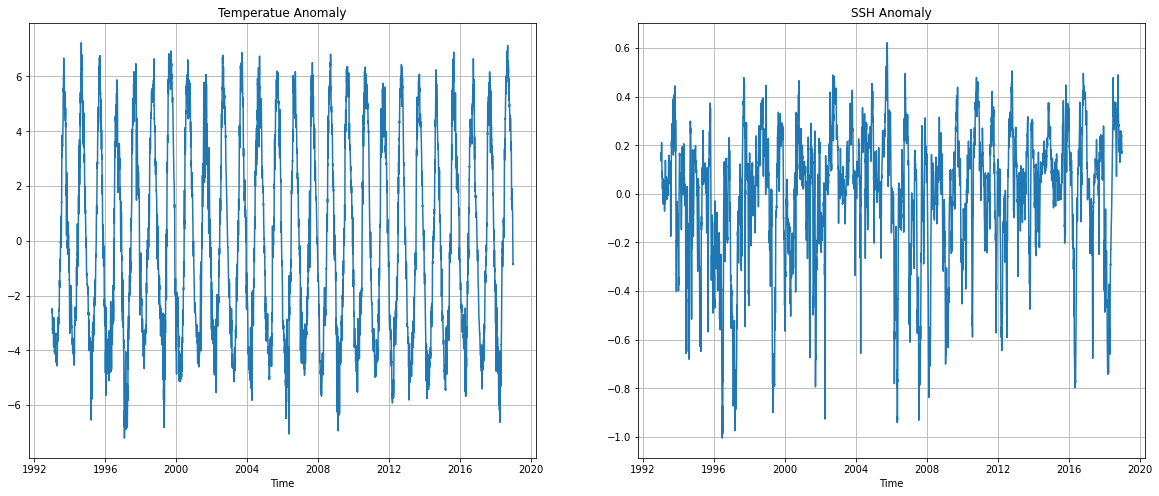

In [ ]:
sst_mean = np.mean(temp)
ssh_mean = np.mean(ssh)
means = [sst_mean, ssh_mean]

sst_anom = np.ma.anom(temp)
ssh_anom = np.ma.anom(ssh)
anoms = [sst_anom, ssh_anom]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].plot_date(time, sst_anom, '-')
axes[0].set_title('Temperatue Anomaly')
axes[1].plot_date(time, ssh_anom, '-')
axes[1].set_title('SSH Anomaly')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')

The temperature anomaly pdf is multimodal.

The SSH pdf is skewed.

In [ ]:
from scipy.stats import gaussian_kde

def kde_density(samples, d=1):
  "d controls range pdf is evaluated over"
  x_d = np.linspace(samples.min() - d, samples.max() + d, 1000) # Grid we evaluate PDF on
  kde = gaussian_kde(samples) # KDE. Using Gaussian kernels
  pdf = kde.evaluate(x_d)
  return x_d, pdf

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

titles = ['SST Anomaly', 'SSH Anomaly']

for i, data in enumerate([sst_anom, ssh_anom]):
  x, pdf = kde_density(data)
  axes[i].plot(x, pdf)
  axes[i].grid()
  axes[i].set_xlabel('Anomaly')
  axes[i].set_ylabel('$\\rho$')

NameError: ignored

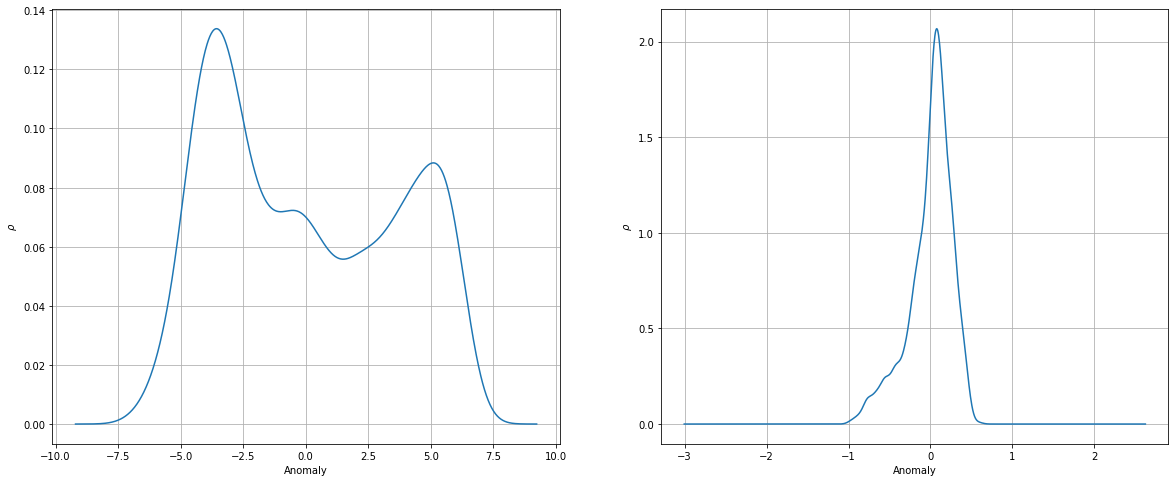

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

titles = ['SST Anomaly', 'SSH Anomaly']

for i, data in enumerate([sst_anom, ssh_anom]):
  x, pdf = kde_density(data, d=2)
  axes[i].plot(x, pdf)
  axes[i].grid()
  axes[i].set_xlabel('Anomaly')
  axes[i].set_ylabel('$\\rho$')

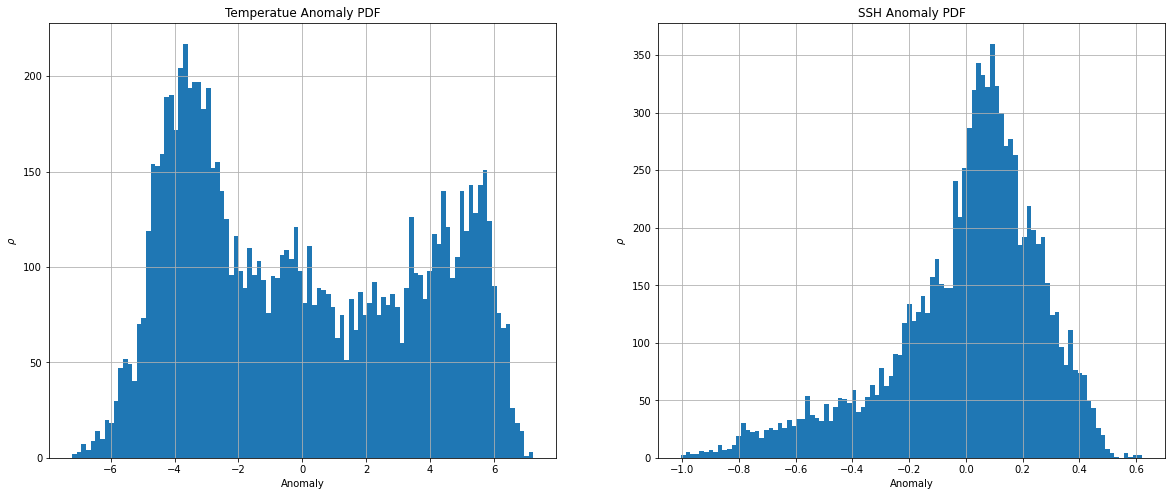

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

no_bins = 100

axes[0].hist(sst_anom, bins = no_bins)
axes[0].set_title('Temperatue Anomaly PDF')
axes[1].hist(ssh_anom, no_bins)
axes[1].set_title('SSH Anomaly PDF')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Anomaly')
    ax.set_ylabel('$\\rho$')

## Exercise 2

We do linear regression to identify possible trends.

Clear that there is some kind of periodic component in the temperature, less clear in the ssh for me.

In [ ]:
from scipy.stats import linregress

First we check if there are is a long term trend by fitting a line of best fit.

Seems that there is a weak trend in the SSH data. None in the SST data.

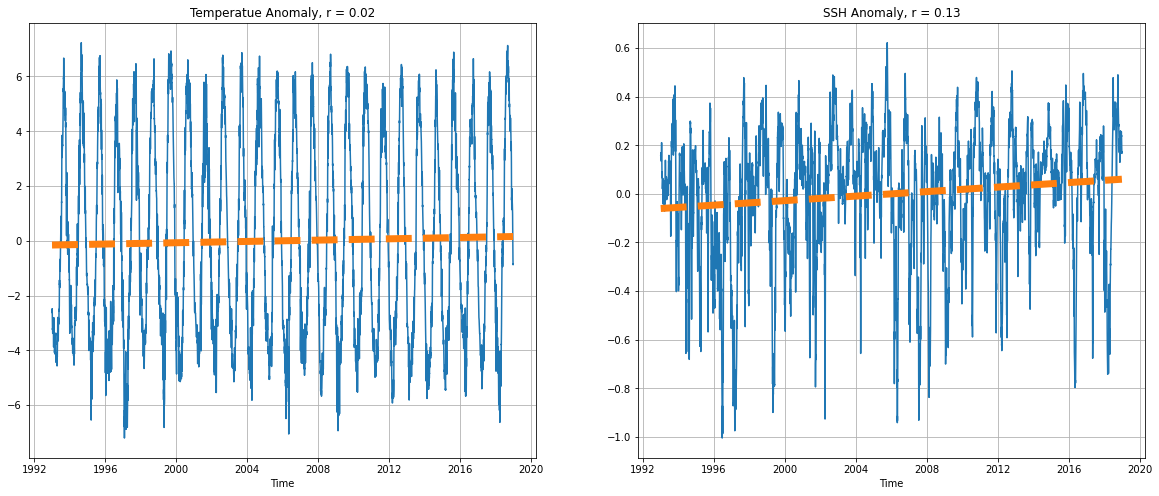

In [ ]:
# Calculating line of best fit

sst_line_parameters = linregress(time, sst_anom)
sst_line = sst_line_parameters[0] * time + sst_line_parameters[1]

ssh_line_parameters = linregress(time, ssh_anom)
ssh_line = ssh_line_parameters[0] * time + ssh_line_parameters[1]


# Plotting Trends 

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].plot_date(time, sst_anom, '-')
axes[0].plot_date(time, sst_line, '--', linewidth='7')
axes[0].set_title(f'Temperatue Anomaly, r = {sst_line_parameters[2]:.2f}')
axes[1].plot_date(time, ssh_anom, '-')
axes[1].plot_date(time, ssh_line, '--', linewidth='7')
axes[1].set_title(f'SSH Anomaly, r = {ssh_line_parameters[2]:.2f}')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')

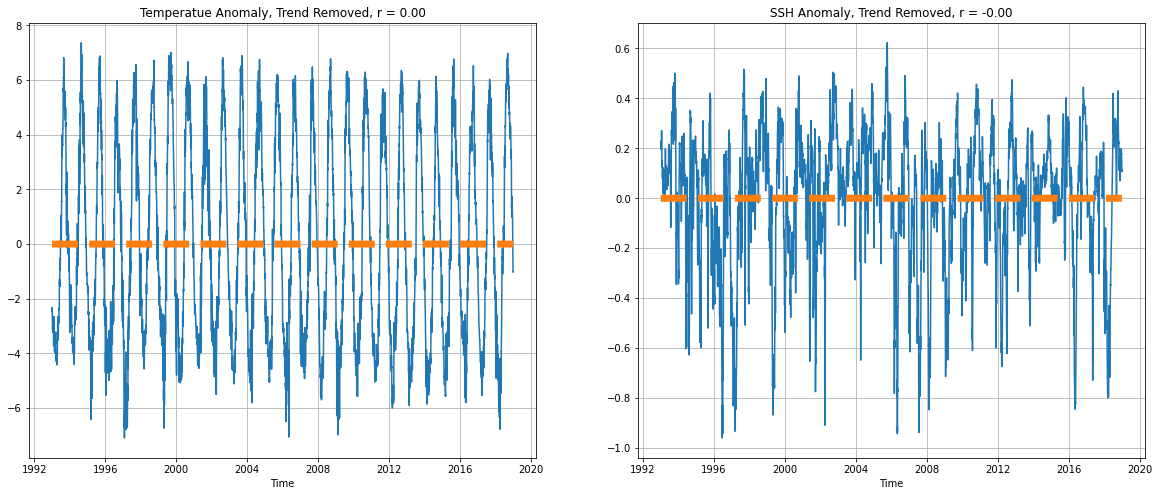

In [ ]:
# Removing long term trend

sst_clean = sst_anom - sst_line
ssh_clean = ssh_anom - ssh_line

# Sanity check plot

sst_cline_parameters = linregress(time, sst_clean)
sst_cline = sst_cline_parameters[0] * time + sst_cline_parameters[1]

ssh_cline_parameters = linregress(time, ssh_clean)
ssh_cline = ssh_cline_parameters[0] * time + ssh_cline_parameters[1]


fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].plot_date(time, sst_clean, '-')
axes[0].plot_date(time, sst_cline, '--', linewidth='7')
axes[0].set_title(f'Temperatue Anomaly, Trend Removed, r = {sst_cline_parameters[2]:.2f}')
axes[1].plot_date(time, ssh_clean, '-')
axes[1].plot_date(time, ssh_cline, '--', linewidth='7')
axes[1].set_title(f'SSH Anomaly, Trend Removed, r = {ssh_cline_parameters[2]:.2f}')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')

For the seasonal cycle removal I think two different straterges are needed.

For the SST we will fit a sine curve.

For the SSH we will do differencing.

In [ ]:
from numpy import polyfit

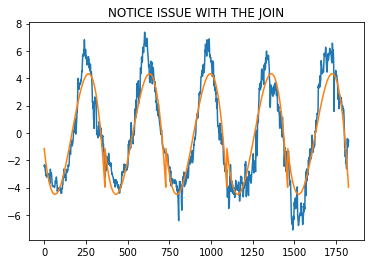

In [ ]:
# SST Seasonal Cycle Removal

# Fit a cubic to the year, then will use the repeat as the curve

degree = 3
length = 365
sst_curve_c = polyfit(time[:length], sst_clean[:length], degree)
sst_curve = np.zeros(length)

for i, c in enumerate(sst_curve_c):
    sst_curve += c * time[:length]**(degree - i)
    
repeat = 5
plt.plot(sst_clean[: repeat * length])
plt.plot(tile(sst_curve, repeat))
plt.title('NOTICE ISSUE WITH THE JOIN')
plt.show()

sst_curve = np.tile(sst_curve, 26)

In [ ]:
# Removal via differencing
diff = list()
days_in_year = 365
for i in range(days_in_year, len(sst_clean)):
    value = sst_clean[i] - sst_clean[i - days_in_year]
    diff.append(value)

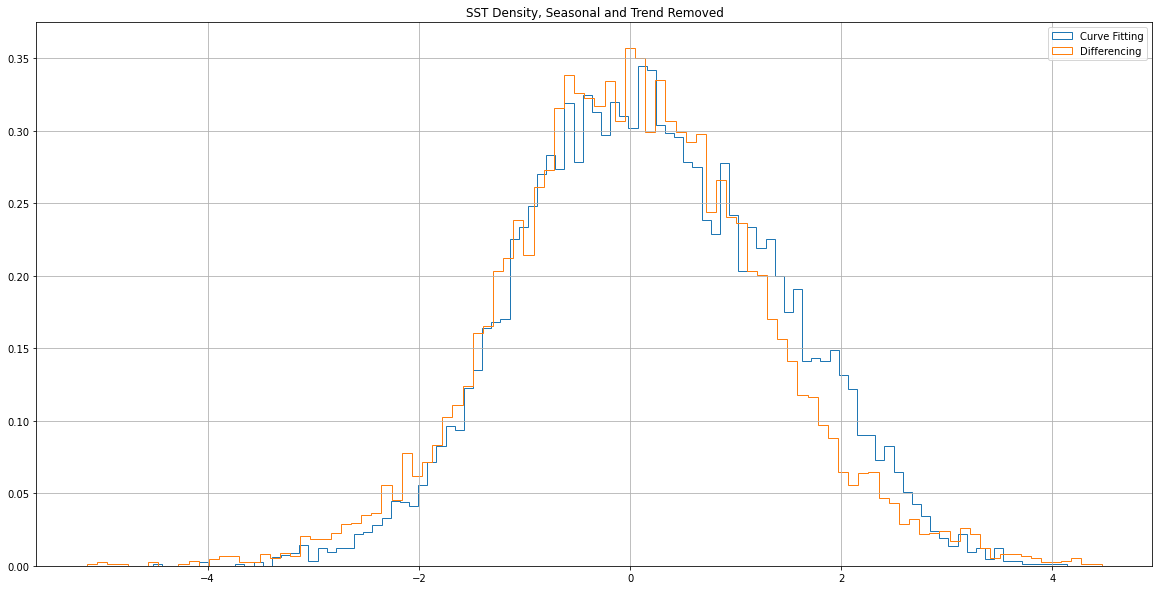

In [ ]:
# Plotting SST Density after clean

sst_so_clean = sst_clean - sst_curve

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(sst_so_clean, bins = 100, histtype='step', density=True, label='Curve Fitting')
ax.set_title('SST Density, Seasonal and Trend Removed')
ax.grid()

ax.hist(diff, bins = 100, histtype='step', density=True, label = 'Differencing')
ax.legend()
fig.show()

In [ ]:
# SSH Removal via differencing
ssh_diff = list()
days_in_year = 365
for i in range(days_in_year, len(ssh_clean)):
    value = ssh_clean[i] - ssh_clean[i - days_in_year]
    ssh_diff.append(value)

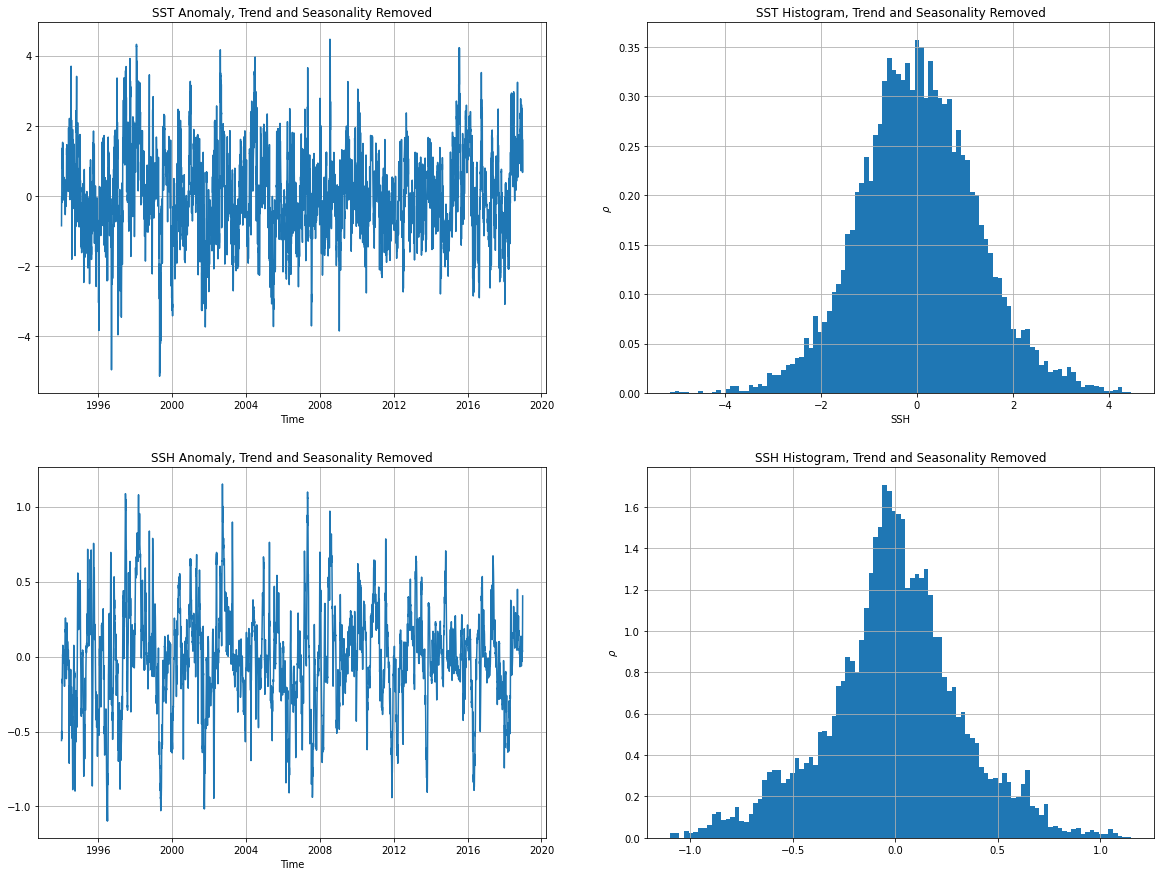

In [ ]:
# Plotting Cleaned Data 

labels= ['SST', 'SSH']
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes[0, 0].plot_date(time[365:], diff, '-')
axes[0, 1].set_ylabel('SST')
axes[0, 0].set_title('SST Anomaly, Trend and Seasonality Removed')

axes[0, 1].hist(diff, bins = 100, density= True)
axes[0, 1].set_xlabel('SST')
axes[0, 1].set_title('SST Histogram, Trend and Seasonality Removed')

axes[1, 0].plot_date(time[365:], ssh_diff, '-')
axes[0, 1].set_ylabel('SSH')
axes[1, 0].set_title('SSH Anomaly, Trend and Seasonality Removed')

axes[1, 1].hist(ssh_diff, bins = 100, density= True)
axes[0, 1].set_xlabel('SSH')
axes[1, 1].set_title('SSH Histogram, Trend and Seasonality Removed')

for ax in axes:
    ax[0].grid()
    ax[1].grid()
    ax[0].set_xlabel('Time')
    ax[1].set_ylabel('$\\rho$')

## Spectral Analysis

We look at:
- Raw anomaly data power spectra
- Spectral decay in the cleaned data

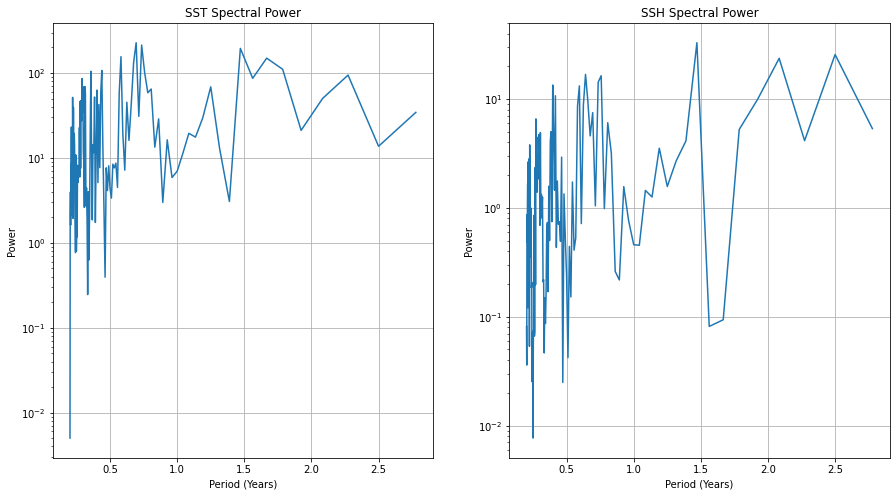

In [ ]:
# Spectral Analysis of Raw Anomaly Data

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
labels = ['SST', 'SSH']


for i, data in enumerate([diff, ssh_diff]):  
    
    # Spectral Analysis
    n = len(data[::1]) # Reduce sampling frequency to remove noise
    dt = 1
    fhat = np.fft.fft(data, n)
    PSD = np.real((fhat * np.conj(fhat))/n)
    freq =  np.arange(n) * (1/(dt * n))
    L = np.arange(np.floor(n/2),dtype='int') # numpy returns symmetirc spectrum, just want first half
    freq=freq[L]
    PSD=PSD[L]
    
    # Defining period limits
    min_year = 0.2 
    max_year = 3
    indices = ((freq < 1/(min_year * 365)) & (freq > 1/(max_year * 365)))
    
    ## Power Spectrum
    axes[i].plot(1/(365 * freq[indices]), PSD[indices])
    axes[i].set_yscale('log')
    axes[i].set_xlabel('Period (Years)')
    axes[i].set_ylabel('Power')
    axes[i].set_title(f'{labels[i]} Spectral Power')
    axes[i].grid()
plt.show()

### Power Law Fitting

In [ ]:
# Functions for power law fit

from scipy.optimize import curve_fit

def powlaw(x, a, b) :
    return a * np.power(x, b)
def linlaw(x, a, b) :
    return a + x * b

def curve_fit_log(xdata, ydata) :
    """Fit data to a power law with weights according to a log scale"""
    # Weights according to a log scale
    # Apply fscalex
    xdata_log = np.log10(xdata)
    # Apply fscaley
    ydata_log = np.log10(ydata)
    # Fit linear
    popt_log, pcov_log = curve_fit(linlaw, xdata_log, ydata_log)
    #print(popt_log, pcov_log)
    # Apply fscaley^-1 to fitted data
    ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))
    # There is no need to apply fscalex^-1 as original data is already available
    return (popt_log, pcov_log, ydatafit_log)

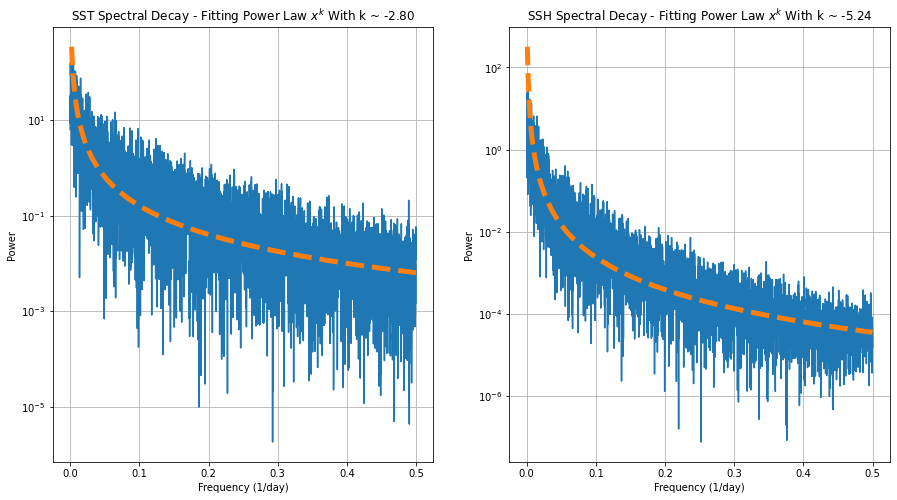

In [ ]:
# Looking at Spectral Decay in Cleaned Data

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
labels = ['SST', 'SSH']


for i, data in enumerate([diff, ssh_diff]): 
    
    # Spectral analysis
    n = len(data[::1]) # Reduce sampling frequency to remove noise
    dt = 1
    fhat = np.fft.fft(data, n)
    PSD = np.real((fhat * np.conj(fhat))/n)
    freq =  np.arange(n) * (1/(dt * n))
    L = np.arange(np.floor(n/2),dtype='int')
    freq=freq[L]
    PSD=PSD[L]
    
    # Fitting a Power Law
    ks = [20, 10] # how many frequencies to dismiss
    k = ks[i]
    opt_log, cov_log, fit_curve = curve_fit_log(freq[k:], PSD[k:])

    # Plot
    axes[i].plot(freq, PSD)
    axes[i].plot(freq[k:], fit_curve, '--', linewidth='5')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('Frequency (1/day)')
    axes[i].set_ylabel('Power')
    axes[i].set_title(f'{labels[i]} Spectral Decay - Fitting Power Law $x^k$ With k ~ {opt_log[0]:.2f}')
    axes[i].grid()
plt.show()


# Code from Julia's Notebook

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import glob, os
import math
import matplotlib.colors as colors
import pandas as pd
from scipy import stats
from scipy import signal
import scipy as sp
from statsmodels.tsa.seasonal import seasonal_decompose 
import urllib.request # the lib that handles the url access

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exercise I 


* Read in the two time series of the corresponding data file for this Project.  The dataconsists of sea surface height (SSH) and sea surface temperature (SST) at the location(153$^{\circ}$E, 33$^{\circ}$N) in the Pacific Ocean between 1993 – 2018.  
* Plot both the SSH andSST anomalies (w.r.t.  to the time mean) and discuss qualitative differences betweenthe time series.

In [ ]:
#@title
#Open data file from url
data = urllib.request.urlopen('https://webspace.science.uu.nl/~dijks101/MPE-CDT/SSH_SST_Pacific.txt')

#Read data as proposed 
lines = data.readlines()

time    = np.zeros(len(lines) - 3)
ssh     = np.zeros(len(time))
temp    = np.zeros(len(time))

for time_i in range(len(time)):
    #Read in the data
    line = lines[time_i + 3].split()

    #Save the corresponding data in the relevant array
    time[time_i]    = datetime.datetime(int(line[2]), int(line[1]), int(line[0])).toordinal()
    ssh[time_i]     = float(line[3])
    temp[time_i]    = float(line[4])

(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 9 Text major ticklabel objects>)

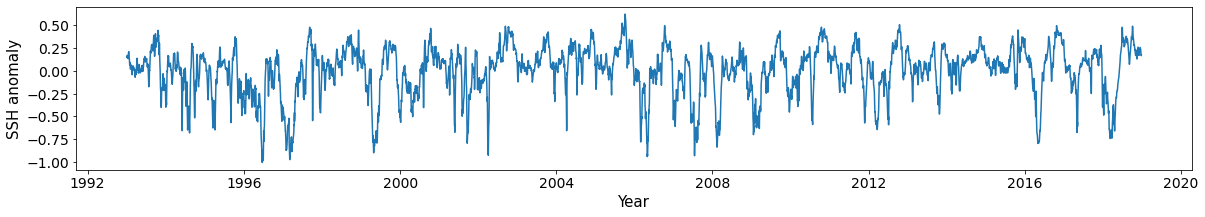

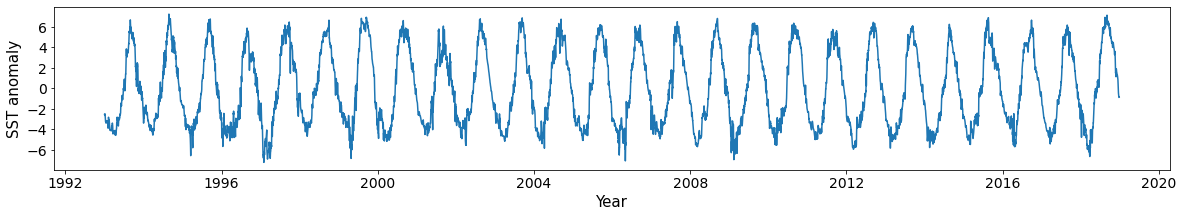

In [ ]:
ssh_anom = ssh - np.mean(ssh)
temp_anom = temp - np.mean(temp)

fig = plt.figure(figsize=(20,3))
plt.xlabel('Year',fontsize=15)
plt.ylabel('SSH anomaly',fontsize=15)
plt.plot_date(time,ssh_anom,'-')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig = plt.figure(figsize=(20,3))
plt.xlabel('Year',fontsize=15)
plt.ylabel('SST anomaly',fontsize=15)
plt.plot_date(time,temp_anom,'-')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


We observe a clear seasonal signature in sea surface temperature, attributable to the annual cycle of solar radiation. On the other hand, the sea surface height is more irregular, with persisting anomalies negative anomalies as a clear signature. The observed data corresponds to a location crossed by the war Kuroshio Current, the the western boundary current of the North Pacific subtropical gyre. It's a meandering current where isolated eddies form and persist for several months. These eddies could alter sea surface height, causing the observed persisting anomalies. 

## Exercise II

* Remove the seasonal cycle and long-term trend.
* Determine the probability density function (PDF) of the time series,  calculate the Fourier spectra and determine the power law coefficient of the spectral power decayat high frequency.  Do this for both SST and SSH. 

### SSH

In [ ]:
#This function computes a moving average with some chosen window size and
#returns the original signal with the removed MA and the MA signal
def ma_remove(data,window):
  numbers_series = pd.Series(data)
  window_size = window
  windows = numbers_series.rolling(window_size)
  moving_averages = windows.mean()
  moving_averages_list = moving_averages.tolist()
  without_nans = moving_averages_list[window_size - 1:]
  ones = np.ones(int((len(data)-len(without_nans)+1)/2))*np.mean(data)
  moving_average = np.concatenate([ones,without_nans,ones])
  correccion = np.ones(len(moving_average))*np.mean(moving_average) - moving_average
  filtered = data + correccion[:-1]
  return filtered, moving_average


#### Option I for long-term removal

In [ ]:
#365 day window moving average to remove longterm trend
#With seasonal_decompose, the seasonal component is first removed by applying a convolution filter to the data. 
#The average of this smoothed series for each period is the returned seasonal component.
from statsmodels.tsa.seasonal import seasonal_decompose 
ssh_anom_filtered, ssh_moving_average = ma_remove(ssh_anom,364)
ssh_stat = seasonal_decompose(ssh_anom,model='additive',freq=365) 

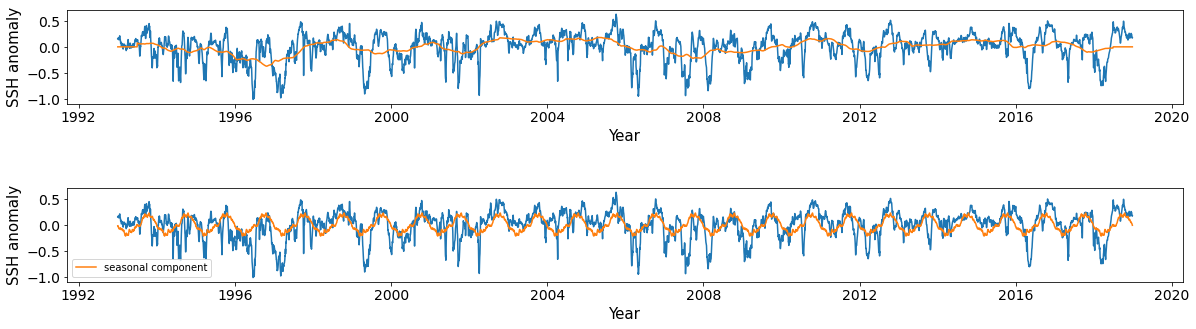

In [ ]:
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace = .9, wspace = .4)
ax = fig.add_subplot(2,1,1)
ax.plot_date(time,ssh_anom,'-')
ax.plot_date(time,ssh_moving_average[:9490],'-')
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('SSH anomaly',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = fig.add_subplot(2,1,2)
ax2.plot_date(time,ssh_anom,'-')
ax2.plot_date(time,ssh_stat.seasonal,'-', label='seasonal component')
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylabel('SSH anomaly',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

#### Option II for long-term removal

(array([-1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 <a list of 11 Text major ticklabel objects>)

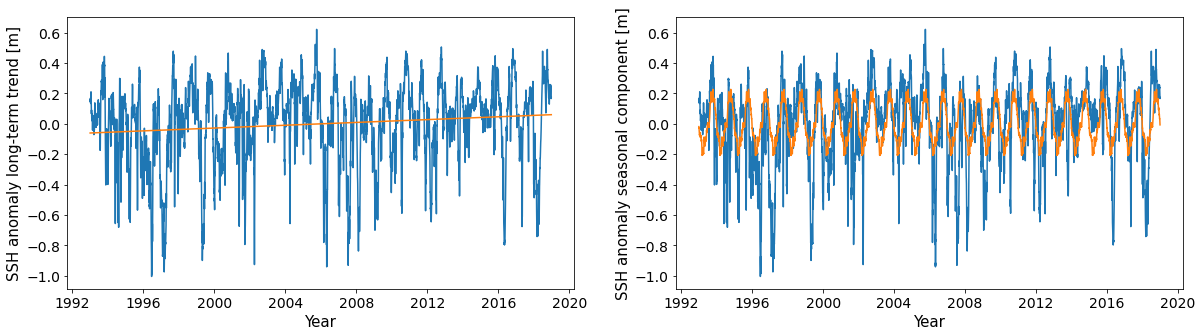

In [ ]:
#Option 2 for trend removal
def linear_trend(senal):
  x = np.arange(0,len(senal))
  z = np.polyfit(x,senal,1)
  return z, x

ssh_anom_trend, x = linear_trend(ssh_anom)
ssh_linear_trend = x*ssh_anom_trend[0] + ssh_anom_trend[1]

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot_date(time,ssh_anom,'-')
ax.plot_date(time,ssh_linear_trend,'-')
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('SSH anomaly long-term trend [m]',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = fig.add_subplot(1,2,2)
ax2.plot_date(time,ssh_anom,'-')
ax2.plot_date(time,ssh_stat.seasonal,'-')
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylabel('SSH anomaly seasonal component [m]',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### SST

In [ ]:
#365 day window moving average to remove longterm trend
#With seasonal_decompose, the seasonal component is first removed by applying a convolution filter to the data. 
#The average of this smoothed series for each period is the returned seasonal component.
from statsmodels.tsa.seasonal import seasonal_decompose 
temp_anom_filtered, temp_moving_average = ma_remove(temp_anom,364)
temp_stat = seasonal_decompose(temp_anom,model='additive',freq=365) 

(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 9 Text major ticklabel objects>)

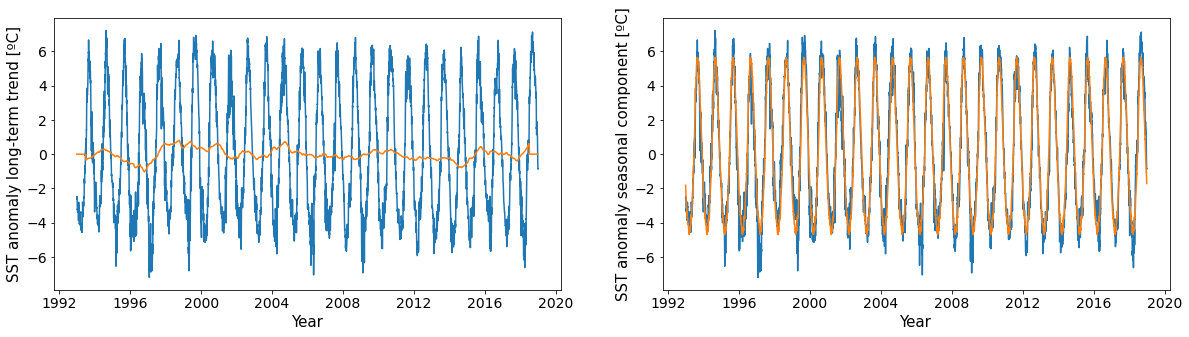

In [ ]:
#@title
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot_date(time,temp_anom,'-')
ax.plot_date(time,temp_moving_average[:9490],'-')
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('SST anomaly long-term trend [ºC]',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = fig.add_subplot(1,2,2)
ax2.plot_date(time,temp_anom,'-')
ax2.plot_date(time,temp_stat.seasonal,'-')
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylabel('SST anomaly seasonal component [ºC]',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 9 Text major ticklabel objects>)

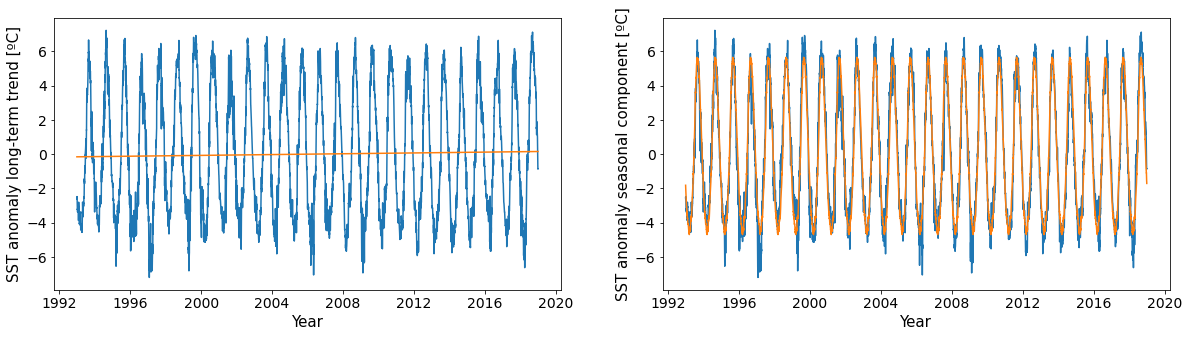

In [ ]:
#Option 2 for trend removal
def linear_trend(senal):
  x = np.arange(0,len(senal))
  z = np.polyfit(x,senal,1)
  trend = x*z[0] + z[1]
  return trend

temp_linear_trend = linear_trend(temp_anom)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot_date(time,temp_anom,'-')
ax.plot_date(time,temp_linear_trend,'-')
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('SST anomaly long-term trend [ºC]',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = fig.add_subplot(1,2,2)
ax2.plot_date(time,temp_anom,'-')
ax2.plot_date(time,temp_stat.seasonal,'-')
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylabel('SST anomaly seasonal component [ºC]',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Filtered timeseries 

(array([-6., -4., -2.,  0.,  2.,  4.]),
 <a list of 6 Text major ticklabel objects>)

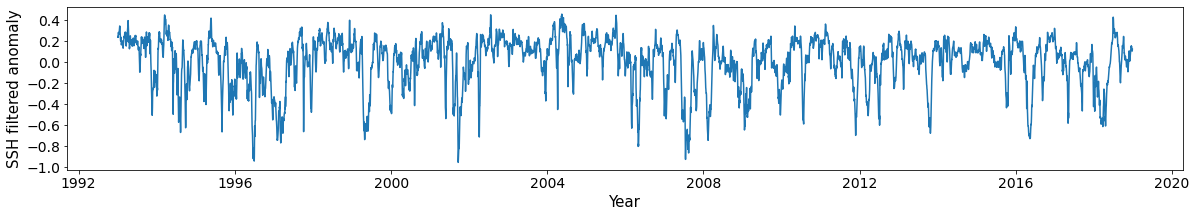

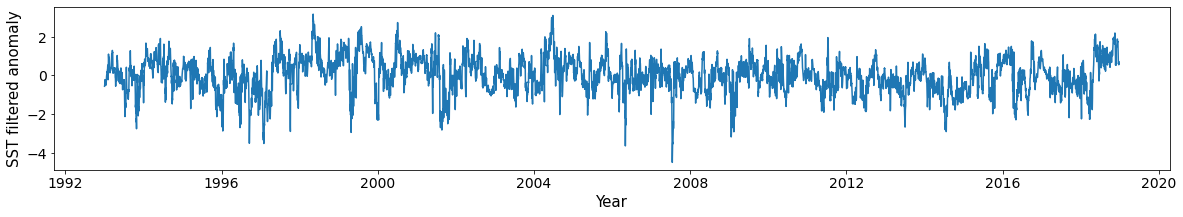

In [ ]:
ssh_filt = ssh_anom - ssh_linear_trend- ssh_stat.seasonal
temp_filt = temp_anom - temp_linear_trend - temp_stat.seasonal

fig = plt.figure(figsize=(20,3))
plt.xlabel('Year',fontsize=15)
plt.ylabel('SSH filtered anomaly',fontsize=15)
plt.plot_date(time,ssh_filt,'-')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig = plt.figure(figsize=(20,3))
plt.xlabel('Year',fontsize=15)
plt.ylabel('SST filtered anomaly',fontsize=15)
plt.plot_date(time,temp_filt,'-')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Probability density functions

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text major ticklabel objects>)

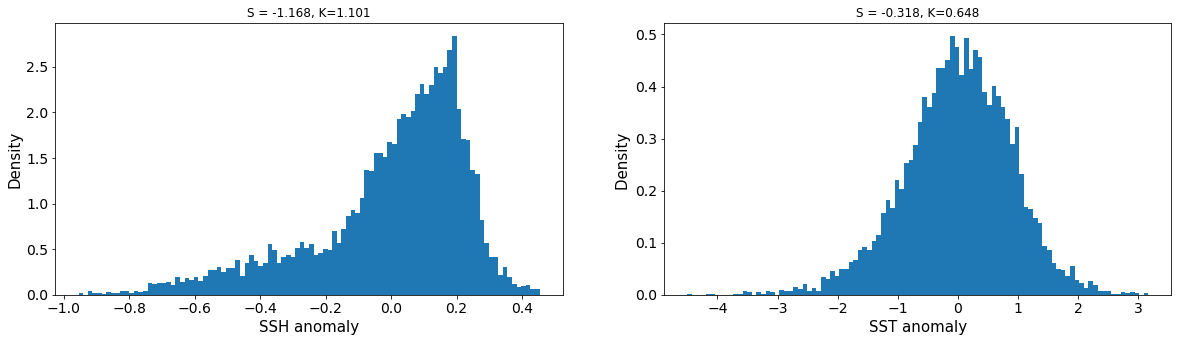

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
n, bins, patches = ax.hist(ssh_filt, bins = 100,density=True)
skewness_ssh = np.mean(ssh_filt**3)/np.std(ssh_filt)**3
kurtosis_ssh = np.mean(ssh_filt**4)/np.std(ssh_filt)**4 - 3
ax.set_xlabel('SSH anomaly',fontsize=15)
ax.set_ylabel('Density',fontsize=15)
ax.set_title('S = '+str(round(skewness_ssh,3))+', K='+str(round(kurtosis_ssh,3)))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = fig.add_subplot(1,2,2)
n, bins, patches = ax2.hist(temp_filt, bins = 100,density=True)
skewness_sst = np.mean(temp_filt**3)/np.std(temp_filt)**3
kurtosis_sst = np.mean(temp_filt**4)/np.std(temp_filt)**4 - 3
ax2.set_xlabel('SST anomaly',fontsize=15)
ax2.set_ylabel('Density ',fontsize=15)
ax2.set_title('S = '+str(round(skewness_sst,3))+', K='+str(round(kurtosis_sst,3)))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

High kurtosis indicates large numbers of extreme events, which might, for example, be associated with rare but strong eddy events (Sura et al., 2009). High kurstosis is associated with high number of extreme events, for example in the eastern pacific, removing the year 1997 diminishes substantially the kurtosis in SSTs. In the case of the SSH anomalies in the Kuroshio Current an example for this can be the year 1997, in which an anomalous behaviour was identified (Toba et al., 1998). SSH might therefore be more sensitive to this kind of events than SSTs. 

Sura P., Gille S. T., Stochastic Dynamics of Sea Surface Height Variability Journal of Physical Oceanography 40, 1582-1596 (2009) 

Toba, Y., Murakami, H. Unusual behavior of the Kuroshio Current System from winter 1996 to summer 1997 revealed by ADEOS-OCTS and other data— Suggestion of topographically forced alternating-jet instability. J Oceanogr 54, 465–478 (1998). https://doi.org/10.1007/BF02742449



1.3652494182050592

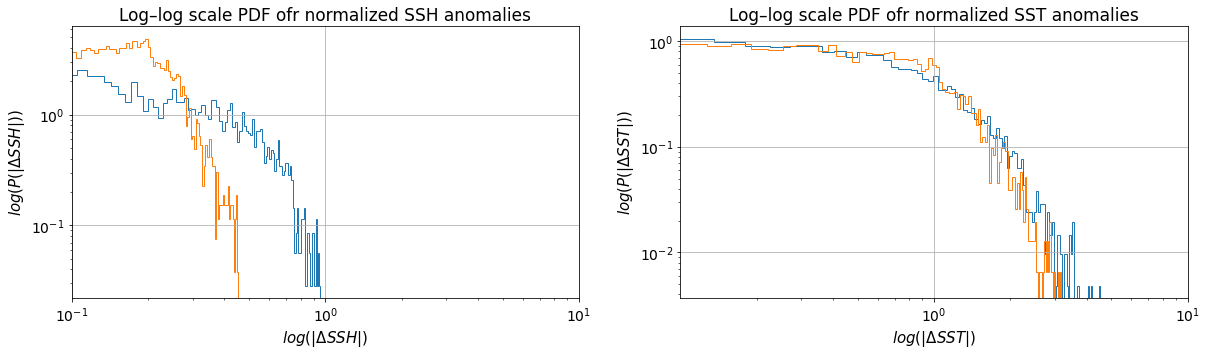

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
n, bins, patches = ax.hist(np.abs(ssh_filt[np.where(ssh_filt < 0)]), bins = 100, histtype='step',density=True)
n, bins, patches = ax.hist(np.abs(ssh_filt[np.where(ssh_filt > 0)]), bins = 100, histtype='step',density=True)
skewness_ssh = np.mean(ssh_filt**3)/np.std(ssh_filt)**3
kurtosis_ssh = np.mean(ssh_filt**4)/np.std(ssh_filt)**4 - 3
ax.set_xlabel('$log(|\Delta SSH|)$',fontsize=15)
ax.set_ylabel('$log(P(|\Delta SSH|))$',fontsize=15)
ax.set_title('Log–log scale PDF ofr normalized SSH anomalies',fontsize = 17)
plt.yscale('log')
plt.xscale('log')
plt.xlim(.1,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
n, bins, patches = ax2.hist(np.abs(temp_filt[np.where(temp_filt < 0)]), bins = 100, histtype='step',density=True)
n, bins, patches = ax2.hist(np.abs(temp_filt[np.where(temp_filt > 0)]), bins = 100, histtype='step',density=True)
skewness_sst = np.mean(temp_filt**3)/np.std(temp_filt)**3
kurtosis_sst = np.mean(temp_filt**4)/np.std(temp_filt)**4 - 3
ax2.set_xlabel('$log(|\Delta SST|)$',fontsize=15)
ax2.set_ylabel('$log(P(|\Delta SST|))$',fontsize=15)
ax2.set_title('Log–log scale PDF ofr normalized SST anomalies',fontsize = 17)
plt.yscale('log')
plt.xscale('log')
plt.xlim(.1,10)
plt.xticks([1,10],fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

skewness_ssh**2

### Power density spectrum 

In [ ]:
#Functions
from scipy import fftpack
def plot_spectrum(senal,title,slope1,slope2):
    X = fftpack.fft(senal)
    freq = fftpack.fftfreq(len(senal[:]),1)
    dt = 1
    T = len(time)
    half_spec = len(freq)//2
    PSD = (np.abs(X[:half_spec])**2)*(dt**2/T)
    x = freq[:len(freq)//2] ; y1 = x**slope1; y2 = x**slope2
    plt.plot(x[500:],PSD[500:],label='PDS') #len(freq)//2
    plt.plot(x[500:],y1[500:],'-g',label = str(slope1) +' slope')
    plt.plot(x[500:],y2[500:],'-r',label = str(slope2) +' slope')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\omega$ [days$^{-1}$]',fontsize=14)
    plt.ylabel('S($\omega$)',fontsize=14)
    plt.title(title,fontsize=14)
    plt.legend()
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


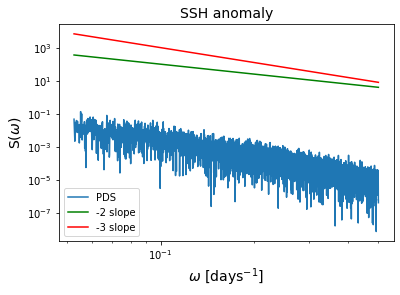

In [ ]:
plot_spectrum(ssh_filt,'SSH anomaly',-2,-3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


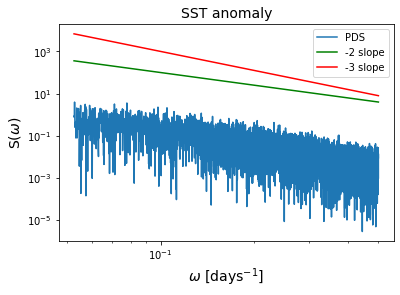

In [ ]:
plot_spectrum(temp_filt,'SST anomaly',-2,-3)

# Code from Jamie's Notebook


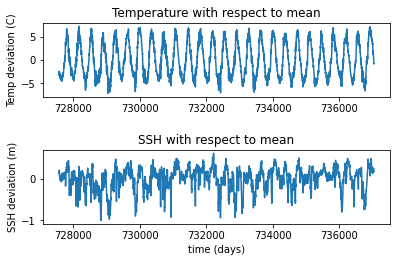

In [ ]:
from pylab import *
import numpy
import datetime
import time
import glob, os
import math
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import scipy.optimize as sp
import urllib.request
#-------------------------------------------------------------------------------
#----------------------------MAIN SCRIPT STARTS HERE----------------------------
#-------------------------------------------------------------------------------

#Get the time series
file = urllib.request.urlopen('https://webspace.science.uu.nl/~dijks101/MPE-CDT/SSH_SST_Pacific.txt')
lines = file.readlines()
file.close()

time    = np.zeros(len(lines) - 3)
ssh     = np.zeros(len(time))
temp    = np.zeros(len(time))

for time_i in range(len(time)):
    #Read in the data
    line = lines[time_i + 3].split()

    #Save the corresponding data in the relevant array
    time[time_i]    = datetime.datetime(int(line[2]), int(line[1]), int(line[0])).toordinal()
    ssh[time_i]     = float(line[3])
    temp[time_i]    = float(line[4])
	
#-------------------------------------------------------------------------------
#----------------------------------EXERCISE 1-----------------------------------
#-------------------------------------------------------------------------------

tempWrtMean=temp-np.mean(temp)
sshWrtMean=ssh-np.mean(ssh)
fig1,(ax1,ax2)=plt.subplots(2)
ax1.plot(time,tempWrtMean)
ax1.set_title("Temperature with respect to mean")
ax1.set_ylabel("Temp deviation (C)")
ax2.set_title("SSH with respect to mean")
ax2.set_ylabel("SSH deviation (m)")
ax2.set_xlabel("time (days)")
ax2.plot(time,sshWrtMean)
plt.tight_layout(pad=2)



To estimate parameter values, the method of maximum likelihood estimation is used (Dacunha-Castelle and Florens-Zmirou, 1986). Given a time series $X_k$ of data taken at times $t_k$, we take a stochastic model intended to explain the data. To quantify how likely a model is to produce the observed time series, we use the negative of the $log-likelihood function$, given by:
\begin{equation}
 -\log \mathcal{L}(\theta) = -\log f_0(X_0|\theta) -\sum_{k=0}^{N-1}\log f(X_{k+1}|X_k;\theta)
\end{equation}
Where $f_0(X_0|\theta)$ is the probability distribution for the initial condition (we can ignore this if we take the initial condition as given), and $f(X_{k+1}|X_k;\theta)$ is the transition probability density for the random process to move from state $X_{k}$ to state $X_{k+1}$ given a set of parameters $\theta$.

To find the parameters, $\theta$ which are most likely to reproduce the data, we can minimise this function with respect to the parameters. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


True
mu0= 0.2645181993494284, lambda0= -0.044662144075356874
True
mu1= 0.2615501399592674, lambda1= -0.04223138160808278, nu1= -0.03237315693436974
True
mu0= 0.028914505010861517, lambda0= -0.007581365421525073
True
mu1= 0.027557213876367313, lambda1= -0.00827843035235807, nu1= -0.034839345387646624


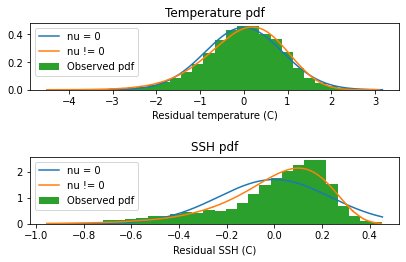

In [ ]:
tempDecomp=seasonal_decompose(tempWrtMean,model='additive',freq=365,two_sided=False)
sshDecomp=seasonal_decompose(sshWrtMean,model='additive',freq=365,two_sided=False)
tempResid=tempDecomp.resid
sshResid=sshDecomp.resid

tempResidNew=tempResid[364:len(tempResid)]
sshResidNew=sshResid[364:len(sshResid)]
timeNew=time[364:len(tempResid)]
dt=1

def logLikelihood(xData,mu,lamb,dt):
    const=np.sqrt(2*np.pi*dt)
    transitProb=(1/(mu*const))*np.exp(-np.square(xData[1:len(xData)-1]-xData[0:len(xData)-2]-lamb*dt*xData[0:len(xData)-2])/(2*mu*mu*dt))
    logLike=-1*np.sum(np.log(transitProb))
    return logLike

def minimiseLogLike(xData,mu0,lamb0,dt):
    def GivenDataLogLike(theta):
        return logLikelihood(xData,np.abs(theta[0]),-1*np.abs(theta[1]),dt)
    result =sp.minimize(GivenDataLogLike,[mu0,lamb0],tol=1e-6,method='SLSQP',options={'maxiter':100})
    print(result.success)
    return result.x

def logLikelihood2(xData,mu,lamb,nu,dt):
    const=np.sqrt(2*np.pi*dt)
    transitProb=(1/((mu+nu*xData[0:len(xData)-2])*const))*np.exp(-np.square(xData[1:len(xData)-1]-xData[0:len(xData)-2]-lamb*dt*xData[0:len(xData)-2])/(2*(mu+nu*xData[0:len(xData)-2])*(mu+nu*xData[0:len(xData)-2])*dt))
    logLike=-1*np.sum(np.log(transitProb))
    return logLike

def minimiseLogLike2(xData,mu0,lamb0,nu0,dt):
    cons=[{'type':'ineq','fun': lambda x: x[0]+x[2]*np.min(xData)},]
    def GivenDataLogLike2(theta):
        return logLikelihood2(xData,theta[0],-1*np.abs(theta[1]),theta[2],dt)
    result =sp.minimize(GivenDataLogLike2,[mu0,lamb0,nu0],tol=1e-6,options={'maxiter':100},constraints=cons)
    print(result.success)
    return result.x

def probDensityFunc(xData,mu,lamb):
    sigmaSq=np.abs(mu*mu/(2*lamb))
    sigma=np.sqrt(sigmaSq)
    x=np.linspace(np.min(xData),np.max(xData),2000)
    pdf=(1/(np.sqrt(2*np.pi)*sigma))*np.exp(lamb*np.square(x)/(mu*mu))
    return x,pdf

def probDensityFunc2(xData,mu,lamb,nu):
    xData=numpy.sort(xData)
    pdf=np.power(mu+nu*xData[1:len(xData-1)],2*((lamb/(nu*nu))-1))*np.exp((-2*lamb*xData[1:len(xData-1)])/(nu*(mu+nu*xData[1:len(xData-1)])))
    pdfint=np.sum(pdf[1:len(xData)-1]*(xData[1:len(xData)-1]-xData[0:len(xData)-2]))
    pdf=pdf/pdfint
    xData=xData[0:len(xData)-1]
    return xData,pdf

fig2,(ax21,ax22)=plt.subplots(2)

def pdfFinder(xData,dt):
    [mu0,lamb0]=minimiseLogLike(xData,1,0.1,dt)
    lamb0=-1*np.abs(lamb0)
    mu0=np.abs(mu0)
    print("mu0= "+str(mu0)+ ", lambda0= "+str(lamb0))
    [mu1,lamb1,nu1]=minimiseLogLike2(xData,mu0,lamb0,0,dt)
    lamb1=-1*np.abs(lamb1)
    print("mu1= "+str(mu1)+", lambda1= "+str(lamb1)+", nu1= "+str(nu1))
    x,pdf=probDensityFunc(xData,mu0,lamb0)
    x2,pdf2=probDensityFunc2(xData,mu1,lamb1,nu1)
    return mu0,lamb0,mu1,lamb1,nu1,x,pdf,x2,pdf2


def pdfFinder2(xData,dt):
    [mu0,lamb0]=minimiseLogLike(xData,0.0290,-0.0082,dt)
    lamb0=-1*np.abs(lamb0)
    mu0=np.abs(mu0)
    print("mu0= "+str(mu0)+ ", lambda0= "+str(lamb0))
    [mu1,lamb1,nu1]=minimiseLogLike2(xData,mu0,lamb0,0,dt)
    lamb1=-1*np.abs(lamb1)
    print("mu1= "+str(mu1)+", lambda1= "+str(lamb1)+", nu1= "+str(nu1))
    x,pdf=probDensityFunc(xData,mu0,lamb0)
    x2,pdf2=probDensityFunc2(xData,mu1,lamb1,nu1)
    return mu0,lamb0,mu1,lamb1,nu1,x,pdf,x2,pdf2

mu0T,lamb0T,mu1T,lamb1T,nu1T,xT,pdfT,x2T,pdf2T=pdfFinder(temp_filt,dt)
mu0S,lamb0S,mu1S,lamb1S,nu1S,xS,pdfS,x2S,pdf2S=pdfFinder2(ssh_filt,dt)

ax21.plot(xT,pdfT,label="nu = 0")
ax21.plot(x2T,pdf2T,label="nu != 0")
ax21.hist(temp_filt,density=True,bins=30,label="Observed pdf")
ax21.set_title("Temperature pdf")
ax21.set_xlabel("Residual temperature (C)")
ax21.legend()

ax22.plot(xS,pdfS,label="nu = 0")
ax22.plot(x2S,pdf2S,label="nu != 0")
ax22.hist(ssh_filt,density=True,bins=30,label="Observed pdf")
ax22.set_title("SSH pdf")
ax22.set_xlabel("Residual SSH (C)")
ax22.legend()
plt.tight_layout(pad=2)
plt.show()



For the $\nu=0$ (Ornstein-Uhlenbeck) process:
\begin{equation}
    dX_t=\lambda X_t dt +\mu dW_t
\end{equation}

If the method of minimising the discrete log likelihood function is used, the parameter values are estimated to be:
\begin{equation}
    \mu=0.265^{\circ}\operatorname{C}\operatorname{day}^{-1/2},\,\, \lambda=-0.044 \operatorname{day}^{-1}
\end{equation}
for the temperature data, and:
\begin{equation}
    \mu=0.0290\operatorname{m}\operatorname{day}^{-1/2},\,\, \lambda=-0.0076\operatorname{day}^{-1}
\end{equation}
for the sea-surface height data.

For the case where $\nu \ne 0$, the SDE is given by:
\begin{equation}
    dX_t=\lambda X_t dt +(\mu+\nu X_t) dW_t
\end{equation}

Using the same method for parameter estimation, we find:
\begin{equation}
    \mu=0.262^{\circ}\operatorname{C}\operatorname{day}^{-1/2},\,\, \lambda=-0.042 \operatorname{day}^{-1},\,\, \nu=-0.032\operatorname{day}^{-1/2}
\end{equation}
for the temperature data, and:
\begin{equation}
    \mu=0.0276\operatorname{m}\operatorname{day}^{-1/2},\,\, \lambda=-0.0083\operatorname{day}^{-1},\,\, \nu=-0.0348\operatorname{day}^{-1/2}
\end{equation}
for the sea-surface height data.

Above, the analytic solutions to the stationary Focker-Planck equation are plotted for the parameters values found. For comparison, the probability density functions of the data sets are included, and show good agreement. The $\nu \ne 0$ case predictably fits the data better, since it contains an extra degree of freedom, but also because it can capture the skew that is observed.

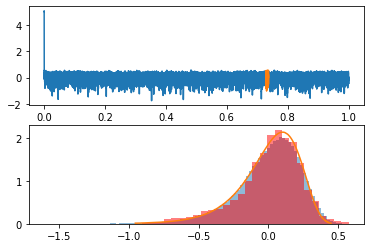

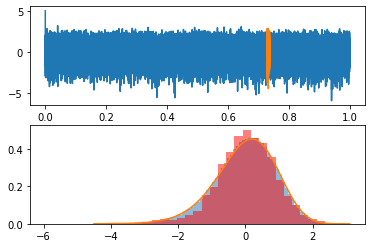

'blue histogram is the Euler Maryama result. Red histogram is the data. Orange curve is analytic pdf'

In [ ]:
def EulerM(nu,lamb,mu,N,X_0,dt):
    X=np.zeros(N)
    X[0]=X_0
    for i in range(0,N-1):
        X[i+1]=X[i]+lamb*dt*X[i]+(mu+nu*X[i])*np.random.normal(0,np.sqrt(dt))
    return X

X=EulerM(-0.0284,-0.0077,0.0278,1000000,5,1)
Xlong=np.zeros(500000)
Xlong[0:500000]=X[500000:len(X)]
fig101,(ax102,ax103)=plt.subplots(2)
ax102.plot(np.arange(0,len(X)),X)
ax102.plot(timeNew,sshResidNew)
ax103.hist(Xlong,density=True,bins=100,alpha=0.5)
ax103.plot(x2S,pdf2S)
ax103.hist(sshResidNew,density=True,bins=30,alpha=0.5,color='r')
plt.show()

X=EulerM(-0.031,-0.046,0.263,1000000,5,1)
Xlong=np.zeros(500000)
Xlong[0:500000]=X[500000:len(X)]
fig100,(ax100,ax101)=plt.subplots(2)
ax100.plot(np.arange(0,len(X)),X)
ax100.plot(timeNew,tempResidNew)
ax101.hist(Xlong,density=True,bins=100,alpha=0.5)
ax101.plot(x2T,pdf2T)
ax101.hist(tempResidNew,density=True,bins=30,alpha=0.5,color='r')
plt.show()
"""blue histogram is the Euler Maryama result. Red histogram is the data. Orange curve is analytic pdf"""

# Definitive figures

In [ ]:
from google.colab import files
from google.colab import drive

i) Time series plots

(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 9 Text major ticklabel objects>)

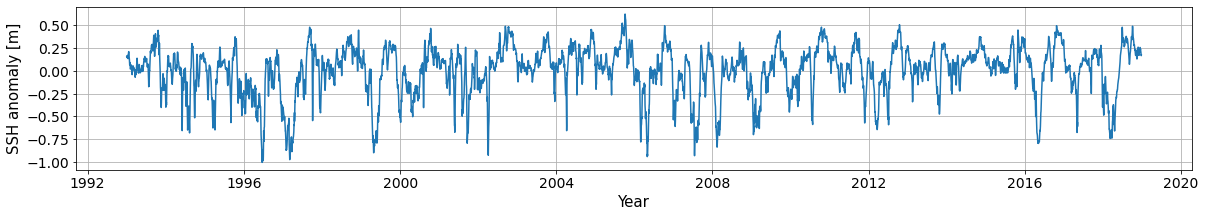

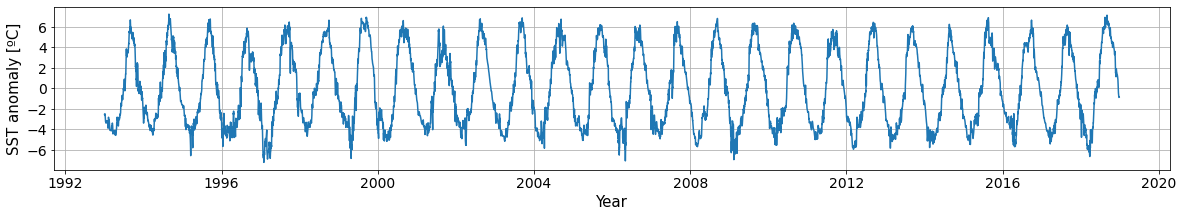

In [ ]:
#@title
fig1 = plt.figure(figsize=(20,3))
plt.xlabel('Year',fontsize=15)
plt.ylabel('SSH anomaly [m]',fontsize=15)
plt.plot_date(time,ssh_anom,'-')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig2 = plt.figure(figsize=(20,3))
plt.xlabel('Year',fontsize=15)
plt.ylabel('SST anomaly [ºC]',fontsize=15)
plt.plot_date(time,temp_anom,'-')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#fig1.savefig("/content/drive/My Drive/SSH_timeseries.png") 
#fig2.savefig("/content/drive/My Drive/SSH_timeseries.png") 

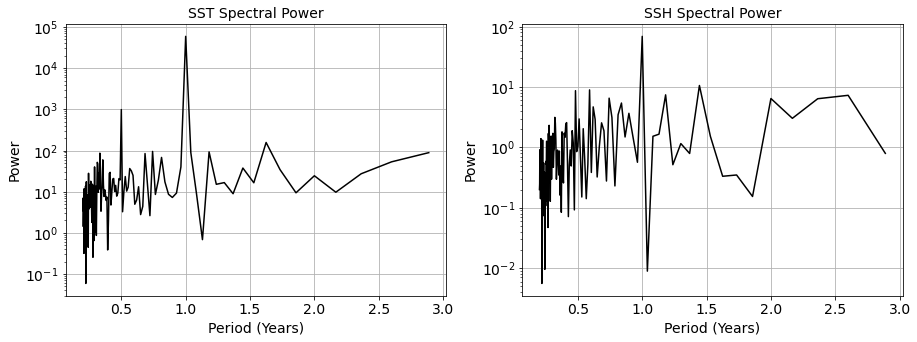

In [ ]:
#@title
# Spectral Analysis of Raw Anomaly Data

def spectral_power(data):
    n = len(data[::1]) # Reduce sampling frequency to remove noise
    dt = 1
    fhat = np.fft.fft(data, n)
    PSD = np.real((fhat * np.conj(fhat))/n)
    freq =  np.arange(n) * (1/(dt * n))
    L = np.arange(np.floor(n/2),dtype='int') # numpy returns symmetirc spectrum, just want first half
    freq=freq[L]
    PSD=PSD[L]
    
    # Defining period limits
    min_year = 0.2 
    max_year = 3
    indices = ((freq < 1/(min_year * 365)) & (freq > 1/(max_year * 365)))
    
    ## Power Spectrum
    return freq[indices], PSD[indices]


def spectral_power_plot(data1,data2,labels):
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  for i, data in enumerate([data1, data2]):  
    
    # Spectral Analysis
    n = len(data[::1]) # Reduce sampling frequency to remove noise
    dt = 1
    fhat = np.fft.fft(data, n)
    PSD = np.real((fhat * np.conj(fhat))/n)
    freq =  np.arange(n) * (1/(dt * n))
    L = np.arange(np.floor(n/2),dtype='int') # numpy returns symmetirc spectrum, just want first half
    freq=freq[L]
    PSD=PSD[L]
    
    # Defining period limits
    min_year = 0.2 
    max_year = 3
    indices = ((freq < 1/(min_year * 365)) & (freq > 1/(max_year * 365)))
    
    ## Power Spectrum
    axes[i].plot(1/(365 * freq[indices]), PSD[indices],'k')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('Period (Years)', fontsize = 14)
    axes[i].set_ylabel('Power', fontsize = 14)
    axes[i].set_title(f'{labels[i]} Spectral Power',fontsize = 14)
    axes[i].grid()
    axes[i].tick_params(axis='both', labelsize=14)
  return fig

labels = ['SST', 'SSH']
figure = spectral_power_plot(temp_anom,ssh_anom,labels)

We removed a linear trend from both datasets, as to remove the long term trend. 

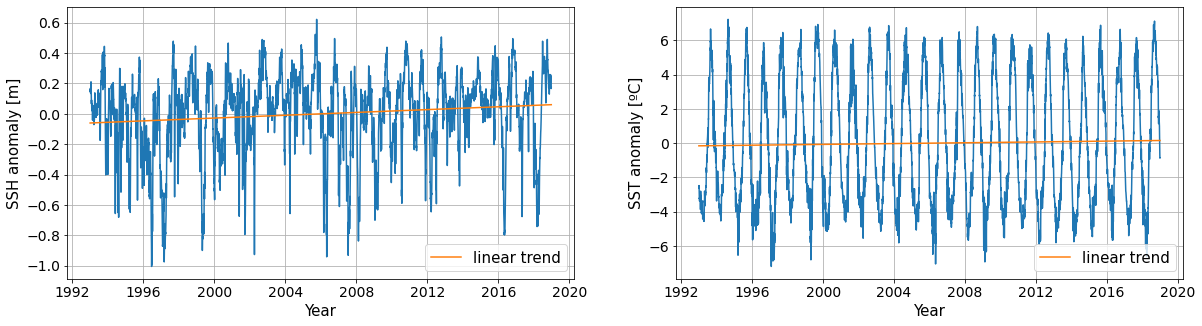

In [ ]:
#@title
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace = .9, wspace = .2)
ax = fig.add_subplot(1,2,1)
ax.plot_date(time,ssh_anom,'-')
ax.plot_date(time,ssh_linear_trend,'-', label = 'linear trend')
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('SSH anomaly [m]',fontsize=15)
ax.grid()
ax.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=15)

ax2 = fig.add_subplot(1,2,2)
ax2.plot_date(time,temp_anom,'-')
ax2.plot_date(time,temp_linear_trend,'-',label = 'linear trend')
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylabel('SST anomaly [ºC]',fontsize=15)
ax2.grid()
ax2.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=15)

And then we remove the seasonal cycle. For this, we consider that we will have succeeded if the spectral power has zero power in the frequency of the year. 
We tried a few methods, first fitting a polinomial to the year, differencing and obtaining the seasonal cycle with the module seasonal_decompose, which performs a seasonal-trend decomposition based on LOESS (Locally Weighted Scatterplot Smoothing). 

R. B. Cleveland, W. S. Cleveland, J.E. McRae, and I. Terpenning (1990) STL: A Seasonal-Trend Decomposition Procedure Based on LOESS. Journal of Official Statistics, 6, 3-73.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


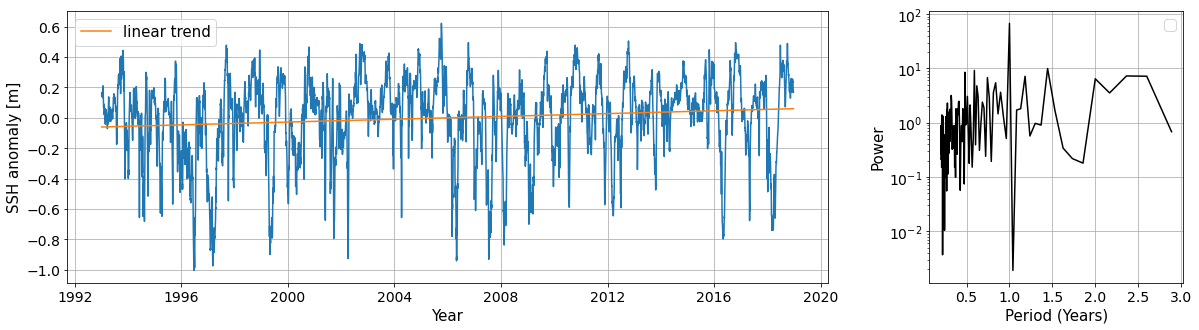

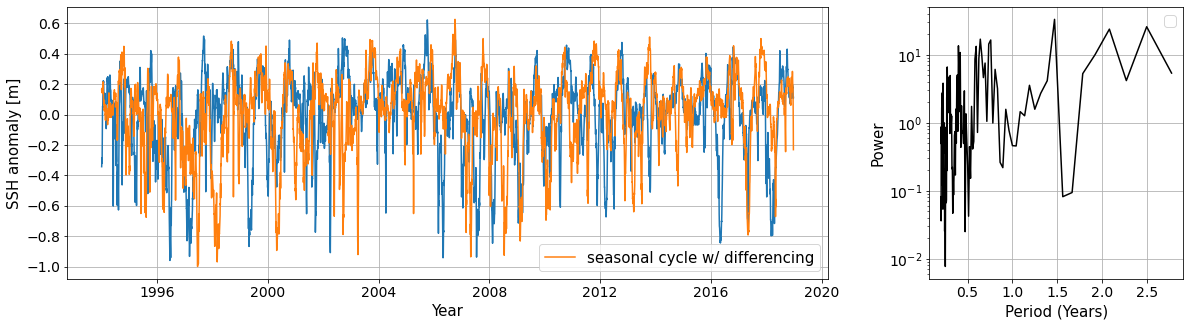

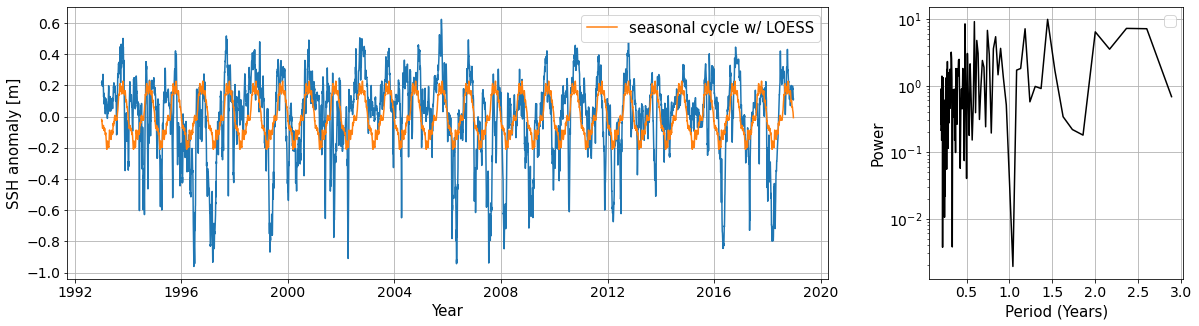

In [ ]:
#@title
from matplotlib import gridspec

def ts_spectrum(data,filter,label_data,label_filter,filtered_data):
  fig = plt.figure(figsize=(20,5))
  gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
  fig.subplots_adjust(hspace = .9, wspace = .2)
  ax1 = plt.subplot(gs[0])
  ax1.plot_date(time,data,'-')
  ax1.plot_date(time,filter,'-', label = label_filter)
  ax1.set_xlabel('Year',fontsize=15)
  ax1.set_ylabel(label_data,fontsize=15)
  ax1.grid()
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.legend(fontsize=15)

  freqs, PSD_ssh = spectral_power(filtered_data)
  ax2 = plt.subplot(gs[1])
  ax2.plot(1/(365*freqs),PSD_ssh,'-k')
  ax2.set_xlabel('Period (Years)',fontsize=15)
  ax2.set_ylabel('Power',fontsize=15) 
  ax2.set_yscale('log')
  ax2.grid()
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.legend(fontsize=15)
  return fig

ssh_linear_removed = ssh_anom - ssh_linear_trend
figure1 = ts_spectrum(ssh_anom, ssh_linear_trend,'SSH anomaly [m]', 
                      'linear trend',ssh_linear_removed)

ssh_seasonal_diff = ssh_anom[365:] - ssh_diff 

fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
fig.subplots_adjust(hspace = .9, wspace = .2)
ax = plt.subplot(gs[0])
ax.plot_date(time[365:],ssh_linear_removed[365:],'-')
ax.plot_date(time[365:],ssh_seasonal_diff,'-', label = 'seasonal cycle w/ differencing')
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('SSH anomaly [m]',fontsize=15)
ax.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

freqs, PSD_ssh = spectral_power(ssh_diff)
ax2 = plt.subplot(gs[1])
ax2.plot(1/(365*freqs),PSD_ssh,'-k')
ax2.set_xlabel('Period (Years)',fontsize=15)
ax2.set_ylabel('Power',fontsize=15)
ax2.set_yscale('log')
ax2.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

figure3 = ts_spectrum(ssh_linear_removed, ssh_stat.seasonal,'SSH anomaly [m]', 'seasonal cycle w/ LOESS',ssh_filt)


No handles with labels found to put in legend.


TypeError: ignored

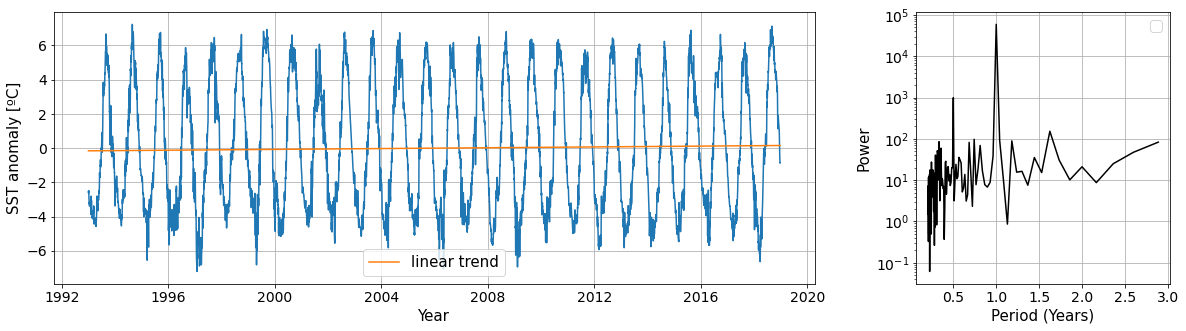

In [ ]:
#@title
temp_linear_removed = temp_anom - temp_linear_trend
figure1 = ts_spectrum(temp_anom, temp_linear_trend,'SST anomaly [ºC]', 
                      'linear trend',temp_linear_removed)

temp_seasonal_diff = sst_anom[365:] - diff 

fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
fig.subplots_adjust(hspace = .9, wspace = .2)
ax = plt.subplot(gs[0])
ax.plot_date(time[365:],temp_linear_removed[365:],'-')
ax.plot_date(time[365:],temp_seasonal_diff,'-', label = 'seasonal cycle w/ differencing')
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('SST anomaly [ºC]',fontsize=15)
ax.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

freqs, PSD_ssh = spectral_power(ssh_diff)
ax2 = plt.subplot(gs[1])
ax2.plot(1/(365*freqs),PSD_ssh,'-k')
ax2.set_xlabel('Period (Years)',fontsize=15)
ax2.set_ylabel('Power',fontsize=15)
ax2.set_yscale('log')
ax2.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

figure3 = ts_spectrum(temp_linear_removed, temp_stat.seasonal,'SST anomaly [ºC]', 'seasonal cycle w/ LOESS',temp_filt)


Qualitative differences between data are the clear seasonal cycle in the sea-surface temperature dataset and the higher power in it's residual, we also observe a peak in 1.6 years, which the differencing filter removed. This was another reason for using LOESS instead of differencing. 

In [ ]:
#@title
fig = plt.figure(figsize=(20,3))
plt.title('Residuals', fontsize= 18)
plt.xlabel('Year',fontsize=15)
plt.ylabel('SSH anomaly [m]',fontsize=15)
plt.plot_date(time,ssh_filt,'-')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig = plt.figure(figsize=(20,3))
plt.xlabel('Year',fontsize=15)
plt.ylabel('SST anomaly [ºC]',fontsize=15)
plt.plot_date(time,temp_filt,'-')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

It is also evident that there are extreme negative events to be found in SSH anomalies, however we don't see positive anomalous extreme events in this dataset, which already points towards a skewed distribution.

In [ ]:
#@title
x, pdf = kde_density(ssh_filt, d=2)
fig = plt.figure(figsize=(15,5))
plt.title('SSH Probability Density Function',fontsize = 18)
plt.text(1.2,2.1,'Skewness = '+str(round(skewness_ssh,3)),fontsize = 15)
plt.text(1.2,1.8,'Excess kurtosis = '+str(round(kurtosis_ssh,3)),fontsize=15)
plt.xlabel('Anomaly',fontsize=16)
plt.ylabel('$\\rho$',rotation = 'horizontal',fontsize=16)
plt.plot(x,pdf,'-g')
plt.fill_between(x,np.zeros(len(pdf)),pdf,'g',alpha = 0.4)
n, bins, patches = plt.hist(ssh_filt, bins = 100,density=True)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

x, pdf = kde_density(temp_filt, d=2)
fig = plt.figure(figsize=(15,5))
plt.title('SST Probability Density Function',fontsize = 18)
plt.text(2.5,0.41,'Skewness = '+str(round(skewness_sst,3)),fontsize = 15)
plt.text(2.5,0.35,'Excess kurtosis = '+str(round(kurtosis_sst,3)),fontsize=15)
plt.xlabel('Anomaly',fontsize=16)
plt.ylabel('$\\rho$',rotation = 'horizontal',fontsize=16)
plt.plot(x,pdf,'-g')
plt.fill_between(x,np.zeros(len(pdf)),pdf,'green',alpha = 0.4)
n, bins, patches = plt.hist(temp_filt, bins = 100,density=True)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Kernel Density Estimation of SST
anomalies using python module 
"gaussian_kde" from "scipy.stats"

$$ S = \frac{\over{{h'}^3}}{\sigma ^{3}} $$
$$ K =  \frac{\over{{h'}^4}}{\sigma ^{4}} - 3 $$

where K is the "excess kurtosis". The standard error for S and K are $\sigma_{skwe} = \frac{6}{N} \approx 0.0006$ and $\sigma_{kurt} = \frac{24}{N}$ \approx 0.002. 

In [ ]:
#@title
#SST
print('Theoretical limit for SSH (Sura et al., 2010): K > 1.5 S^2 - 1.5','For SSH, 1.5 S^2 - 1.5 = ', 1.5*skewness_ssh**2 - 1.5, 'K = ',kurtosis_ssh)
#SSH
print('Theoretical limit for SST (Sura et al., 2008): K > 1.5 S^2 ','For SSTs, 1.5 S^2 = ', 1.5*skewness_sst**2 , 'K = ',kurtosis_sst)

High kurtosis indicates large numbers of extreme events, which might, for example, be associated with rare but strong eddy events (Sura et al., 2009). High kurstosis is associated with high number of extreme events, for example in the eastern pacific, removing the year 1997 diminishes substantially the kurtosis in SSTs. In the case of the SSH anomalies in the Kuroshio Current an example for this can be the year 1997, in which an anomalous behaviour was identified (Toba et al., 1998). SSH might therefore be more sensitive to this kind of events than SSTs. 

Sura P., Gille S. T., Stochastic Dynamics of Sea Surface Height Variability Journal of Physical Oceanography 40, 1582-1596 (2009) 

Toba, Y., Murakami, H. Unusual behavior of the Kuroshio Current System from winter 1996 to summer 1997 revealed by ADEOS-OCTS and other data— Suggestion of topographically forced alternating-jet instability. J Oceanogr 54, 465–478 (1998). https://doi.org/10.1007/BF02742449

We are also interested in understanding the skewness, so we estimate the rate of decay at one side and the other of the distributtion. 

In [ ]:
#@title
# Functions for power law fit

from scipy.optimize import curve_fit

def powlaw(x, a, b) :
    return a * np.power(x, b)
def linlaw(x, a, b) :
    return a + x * b

def curve_fit_log(xdata, ydata) :
    """Fit data to a power law with weights according to a log scale"""
    # Weights according to a log scale
    # Apply fscalex
    xdata_log = np.log10(xdata)
    # Apply fscaley
    ydata_log = np.log10(ydata)
    # Fit linear
    popt_log, pcov_log = curve_fit(linlaw, xdata_log, ydata_log)
    #print(popt_log, pcov_log)
    # Apply fscaley^-1 to fitted data
    ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))
    # There is no need to apply fscalex^-1 as original data is already available
    return (popt_log, pcov_log, ydatafit_log)



In [ ]:
#@title
x, pdf_negative = kde_density(np.abs(ssh_filt[np.where(ssh_filt < 0)]), d=2)
x, pdf_positive = kde_density(np.abs(ssh_filt[np.where(ssh_filt > 0)]), d=2)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(x,pdf_positive,label='positive anomalies')
ax.plot(x,pdf_negative,label='negative anomalies')
skewness_ssh = np.mean(ssh_filt**3)/np.std(ssh_filt)**3
kurtosis_ssh = np.mean(ssh_filt**4)/np.std(ssh_filt)**4 - 3
ax.set_xlabel('SSH anomaly',fontsize=15)
ax.set_ylabel('Density',fontsize=15)
plt.yscale('log')
plt.xscale('log')
plt.xlim(.1,10)
plt.ylim(1e-3,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

x, pdf_negative = kde_density(np.abs(temp_filt[np.where(temp_filt < 0)]), d=2)
x, pdf_positive = kde_density(np.abs(temp_filt[np.where(temp_filt > 0)]), d=2)
opt_log, cov_log, fit_curve_pos = curve_fit_log(x[300:],pdf_positive[300:])
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,pdf_positive)
ax2.plot(x,pdf_negative)
#ax2.plot(x,fit_curve_pos,'--',color='k')
skewness_sst = np.mean(temp_filt**3)/np.std(temp_filt)**3
kurtosis_sst = np.mean(temp_filt**4)/np.std(temp_filt)**4 - 3
ax2.set_xlabel('SST anomaly',fontsize=15)
ax2.set_ylabel('Density ',fontsize=15)
plt.yscale('log')
plt.xscale('log')
plt.xlim(.1,10)
plt.ylim(1e-4,10)
plt.xticks([1,10],fontsize=14)
plt.yticks(fontsize=14)


In [ ]:
#@title
from numpy import random 
ssh_std = np.std(ssh_filt); temp_std = np.std(temp_filt)
ssh_filt_std  = ssh_filt / ssh_std
temp_filt_std = temp_filt / temp_std

ssh_gaussian = random.normal(loc=0, scale=1, size=(100000))
x_ssh_gauss, ssh_gauss = kde_density(ssh_gaussian, d=2)
temp_gaussian = random.normal(loc=0, scale=1, size=(100000))
x_temp_gauss, temp_gauss = kde_density(temp_gaussian, d=2)

In [ ]:
#@title
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
n, bins, patches = ax.hist(np.abs(ssh_filt_std[np.where(ssh_filt_std < 0)]), bins = 100, histtype='step',density=True,label='$\Delta SSH < 0$')
n, bins, patches = ax.hist(np.abs(ssh_filt_std[np.where(ssh_filt_std > 0)]), bins = 100, histtype='step',density=True,label='$\Delta SSH > 0$')
skewness_ssh = np.mean(ssh_filt**3)/np.std(ssh_filt)**3
kurtosis_ssh = np.mean(ssh_filt**4)/np.std(ssh_filt)**4 - 3
xp, pdf_positive = kde_density(np.abs(ssh_filt_std[np.where(ssh_filt_std > 0)]), d=2)
x_min = np.min(pdf_positive[500:])
n = len(pdf_positive[500:])
x_i = np.abs(pdf_positive[500:])
suma = 1 + n*(np.sum(np.log(x_i/x_min)))**(-1)
y1 = x**(-2)
plt.plot(x,y1*0.8,'--k')
y2 = x**(-5)
plt.plot(x,y2*0.9,'--k',label='power-law')
plt.plot(x_ssh_gauss,ssh_gauss,'-k',label='gaussian PDF')
ax.set_xlabel('$log(|\Delta SSH|)$',fontsize=15)
ax.set_ylabel('$log(P(|\Delta SSH|))$',fontsize=15)
ax.set_title('Log–log scale PDF for normalized SSH anomalies',fontsize = 17)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,10)
plt.ylim(10e-3,10)
plt.yticks(fontsize=14)
plt.xticks([1,10],[1,10],fontsize=14)
plt.grid()
plt.legend()

ax2 = fig.add_subplot(1,2,2)
n, bins, patches = ax2.hist(np.abs(temp_filt_std[np.where(temp_filt_std < 0)]), bins = 100, histtype='step',density=True,label='$\Delta SST < 0$')
n, bins, patches = ax2.hist(np.abs(temp_filt_std[np.where(temp_filt_std > 0)]), bins = 100, histtype='step',density=True,label='$\Delta SST > 0$')
skewness_sst = np.mean(temp_filt**3)/np.std(temp_filt)**3
kurtosis_sst = np.mean(temp_filt**4)/np.std(temp_filt)**4 - 3
plt.plot(x,y1*0.9,'--k',label='power-law')
plt.plot(x_temp_gauss,temp_gauss,'-k',label='gaussian PDF')
ax2.set_xlabel('$log(|\Delta SST|)$',fontsize=15)
ax2.set_ylabel('$log(P(|\Delta SST|))$',fontsize=15)
ax2.set_title('Log–log scale PDF for normalized SST anomalies',fontsize = 17)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,10)
plt.ylim(10e-3,10)
plt.xticks([1,10],[1,10],fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend()



In this figure we show the PDF of SSH and SST anomalies of the absolute values of the positive and negative anomalies, that is, we are looking at the two tails of the PDF. We don't show the center of the PDF because the center resembles a Gaussian. 

The x-axis starts in 1 $\sigma$ (standard deviation), so we are looking at the tails. 

The conclusion from the previous plot is that the negative tail has a lower decay rate, and that both show to have a power-law behaviour. 

A highly non-Gaussian power-law tail ($ P(h') \propto h'^{-\alpha}$) in this plot will appear as a streight line. 


\\
Power laws play an important role in quantifying the probability of extreme events in many disciplines as diverse as physics, earth and planetary sciences, biology, economics and finance, computer science,and social sciences. It also indicates self-similarity, this self-similarity is observed in many non-Gaussian natural phenomena and it is interesting to find it in SSH anomalies. This power-law tails and the relationship between skewness and kurtosis are in agreement with the theoretical PDF derived from first principals in Sura et al. (2009). 

In [ ]:
#@title
#Inequality for K-S

k_limit_ssh = ((skewness_ssh)**2)*1.5 - 1.5
k_limit_sst = ((skewness_sst)**2)*1.5 - 1.5
print('SSH',k_limit_ssh,'SST',k_limit_sst)

In [ ]:
#@title
# Looking at Spectral Decay in Cleaned Data

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
labels = ['SST', 'SSH']

for i, data in enumerate([temp_filt[1:], ssh_filt[1:]]): 
    
    # Spectral analysis
    n = len(data[::1]) # Reduce sampling frequency to remove noise
    dt = 1
    fhat = np.fft.fft(data, n)
    PSD = np.real((fhat * np.conj(fhat))/n)
    freq =  np.arange(n) * (1/(dt * n))
    L = np.arange(np.floor(n/2),dtype='int')
    freq=freq[L]
    PSD=PSD[L]
    
    #Confidence intervals
    eps = 0.05
    gamma = -np.log(0.05/(len(freq)-1))
    # Fitting a Power Law
    ks = [100,100] # how many frequencies to dismiss in fitting
    k = ks[i]
    opt_log, cov_log, fit_curve = curve_fit_log(freq[k:], PSD[k:])

    # Plot
    axes[i].plot(freq, PSD)
    axes[i].plot(freq[k:], fit_curve, '-', linewidth='4')
    axes[i].plot(freq[k:], fit_curve*gamma, '--', color='orange', linewidth='2')
    axes[i].plot(freq[k:], fit_curve/gamma, '--', color='orange',linewidth='2')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('Frequency (1/day)')
    axes[i].set_ylabel('Power')
    axes[i].set_ylim(10e-8,10e3)
    axes[i].set_title(f'{labels[i]} Spectral Decay - Fitting Power Law $x^k$ With k ~ {opt_log[1]:.2f}')
    axes[i].grid()
plt.show()

In [ ]:
import numpy as np

Euler-Muriyama

For the $\nu=0$ (Ornstein-Uhlenbeck) process:
\begin{equation}
    dX_t=\lambda X_t dt +\mu dW_t
\end{equation}

For the case where $\nu \ne 0$, the SDE is given by:
\begin{equation}
    dX_t=\lambda X_t dt +(\mu+\nu X_t) dW_t
\end{equation}


In [ ]:
#@title
#Analitic solution 
def analitica(c_lam,c_m,c_n,x):
  F = 2*c_lam/(c_n**2) - 2
  p =  (c_n*x + c_m)**F * np.exp(-2*c_lam*x/(c_n*(c_n*x + c_m)))
  return p

#E-M  
def A(y, t):
    """Implement the Ornstein–Uhlenbeck mu."""  # = \theta (\mu-Y_t)
    return c_lambda*y

def B(y, t):
    """Implement the Ornstein–Uhlenbeck sigma."""  # = \sigma
    return c_mu + c_nu*y

def dW(delta_t):
    """Sample a random number at each call."""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

def dg_dt(delta_t):
    """Returns first derivative of g"""
    return 0.

def dZ(delta_t):
    """Stochastic component"""
    return dg_dt(delta_t)*delta_t + c_sigma*dW(delta_t) 
    
num_sims = 5  # Display five runs

t_init = 1; t_end  = 1000
N      = 100000  # Compute 1000 grid points
dt     = float(t_end - t_init) / N

y_init = 0; c_lambda = -0.048; c_mu = 0.265 ; c_nu = 0.

ts = np.arange(t_init, t_end + dt, dt); ys = np.zeros(N + 1)
ys[0] = y_init
Ys_add = np.array([])
for _ in range(num_sims):
    for i in range(1, ts.size):
        t = (i - 1) * dt
        y = ys[i - 1]
        ys[i] = y + A(y, t) * dt + B(y, t) * dW(dt)
    Ys_add = np.append(Ys_add,ys) #Here I concatenate all simulations to get a PDF of all simulations
    plt.plot(ts, ys)

plt.xlabel("time (s)")
h = plt.ylabel("y")
h.set_rotation(0)
plt.title('First I try the EM without multiplicative noise')
plt.show()

x, pdf = kde_density(Ys_add, d=2)
fig = plt.figure(figsize=(15,5))
plt.title('Ornstein–Uhlenbeck PDF',fontsize = 18)
plt.xlabel('Anomaly',fontsize=16)
plt.ylabel('$\\rho$',rotation = 'horizontal',fontsize=16)
plt.plot(x,pdf,'-g')
plt.fill_between(x,np.zeros(len(pdf)),pdf,'g',alpha = 0.4)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


SST multiplicative noise - sanity check 
I'm not using the right constant $C_{0}$, just using $C_{0}=1$ and dividing by a constant so to compare the shapes. I think it behaves correctly. Should check the constant of integration to show plots, though. 

In [ ]:
#@title
num_sims = 5  # Display five runs

t_init = 1; t_end  = 1000
N      = 10000  # Compute 1000 grid points
dt     = float(t_end - t_init) / N

y_init = 0; c_lambda = -0.046; c_mu = 0.263 ; c_nu = -0.031

ts = np.arange(t_init, t_end + dt, dt); ys = np.zeros(N + 1)
ys[0] = y_init
Ys = np.array([])
for _ in range(num_sims):
    for i in range(1, ts.size):
        t = (i - 1) * dt
        y = ys[i - 1]
        ys[i] = y + A(y, t) * dt + B(y, t) * dW(dt)
    Ys = np.append(Ys,ys) #Here I concatenate all simulations to get a PDF of all simulations
    plt.plot(ts, ys)

plt.xlabel("time (s)")
h = plt.ylabel("y")
h.set_rotation(0)
plt.title('EM with multiplicative noise')
plt.show()

x, pdf = kde_density(Ys, d=2)
fig = plt.figure(figsize=(15,5))
plt.title('CAM Probability Density Function',fontsize = 18)
plt.xlabel('Anomaly',fontsize=16)
plt.ylabel('$\\rho$',rotation = 'horizontal',fontsize=16)
plt.plot(x,pdf,'-g')
plt.fill_between(x,np.zeros(len(pdf)),pdf,'g',alpha = 0.4)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


x = np.linspace(-10,10,1001)
p = analitica(c_lambda,c_mu,c_nu,x)
plt.plot(x,p/10e56,'r')
plt.title("Analitic solution")

SSH parameters

In [ ]:
#@title
y_init = 0; c_lambda = -0.0077; c_mu = 0.0278 ; c_nu = -0.0284

ts = np.arange(t_init, t_end + dt, dt); ys = np.zeros(N + 1)
ys[0] = y_init
Ys = np.array([])
for _ in range(num_sims):
    for i in range(1, ts.size):
        t = (i - 1) * dt
        y = ys[i - 1]
        ys[i] = y + A(y, t) * dt + B(y, t) * dW(dt)
    Ys = np.append(Ys,ys) #Here I concatenate all simulations to get a PDF of all simulations
    plt.plot(ts, ys)

plt.xlabel("time (s)")
h = plt.ylabel("y")
h.set_rotation(0)
plt.title('First I try the EM without multiplicative noise')
plt.show()

x, pdf = kde_density(Ys, d=2)
fig = plt.figure(figsize=(15,5))
plt.title('CAM Probability Density Function',fontsize = 18)
plt.xlabel('Anomaly',fontsize=16)
plt.ylabel('$\\rho$',rotation = 'horizontal',fontsize=16)
plt.plot(x,pdf,'-g')
plt.fill_between(x,np.zeros(len(pdf)),pdf,'g',alpha = 0.4)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

x = np.linspace(-10,10,1001)
p = analitica(c_lambda,c_mu,c_nu,x)
plt.plot(x,p/(0.4*10e32),'r')
plt.title("Analitic solution")

In [ ]:
#@title
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
labels = ['Simulated red noise', 'SST']

for i, data in enumerate([Ys[1:], temp_filt[1:]]): 
    
    # Spectral analysis
    n = len(data[::1]) # Reduce sampling frequency to remove noise
    dt = 1
    fhat = np.fft.fft(data, n)
    PSD = np.real((fhat * np.conj(fhat))/n)
    freq =  np.arange(n) * (1/(dt * n))
    L = np.arange(np.floor(n/2),dtype='int')
    freq=freq[L]
    PSD=PSD[L]
    
    #Confidence intervals
    eps = 0.05
    gamma = -np.log(0.05/(len(freq)-1))
    # Fitting a Power Law
    ks = [50,50] # how many frequencies to dismiss in fitting
    k = ks[i]
    opt_log, cov_log, fit_curve = curve_fit_log(freq[k:], PSD[k:])

    # Plot
    axes[i].plot(freq, PSD)
    axes[i].plot(freq[k:], fit_curve, '-', linewidth='4')
    axes[i].plot(freq[k:], fit_curve*gamma, '--', color='orange', linewidth='2')
    axes[i].plot(freq[k:], fit_curve/gamma, '--', color='orange',linewidth='2')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('Frequency (1/day)')
    axes[i].set_ylabel('Power')
    axes[i].set_ylim(10e-8,10e3)
    axes[i].set_title(f'{labels[i]} Spectral Decay - Fitting Power Law $x^k$ With k ~ {opt_log[1]:.2f}')
    axes[i].grid()
plt.show()